<a href="https://colab.research.google.com/github/aswinigh/Cloth-simulation/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
df_x = pd.read_csv('/content/simulation_data_x.csv')
df_x.head()

,Vertex,x,y,z
0,0,-1.302110,-1.292617,-18.292028
1,1,1.347602,-1.166909,-18.300309
2,2,-1.177302,1.339230,-18.299922
3,3,1.194597,1.187820,-18.194202
4,4,-1.190407,1.201361,-18.301665


In [26]:
len(df_x)

40000

In [0]:
import matplotlib.pyplot as plt

In [0]:
scene = []
for j in range(5):
  frame = []
  for i in range(20):
    frame.append(df_x[j*8000+i*400:j*8000+i*400+400])
  scene.append(frame)

In [32]:
scene[1][5][' x ']

10000   -2.522755
10001    2.640486
10002   -2.453123
10003    2.701899
10004   -2.638905
           ...   
10395    3.117320
10396    2.961124
10397    2.820948
10398    2.689412
10399    2.607882
Name:  x , Length: 400, dtype: float64

# Data Exploration
We plot the means and standard deviations changing with respect to frame count(time)

In [0]:
means_x = [scene[0][i][' x '].astype(float).mean() for i in range(20)]
means_y = [scene[0][i][' y '].astype(float).mean() for i in range(20)]
means_z = [scene[0][i][' z '].astype(float).mean() for i in range(20)]

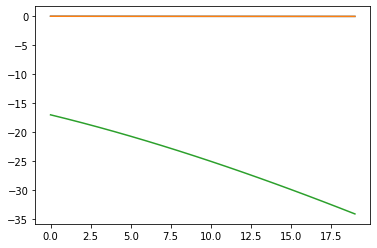

In [34]:
plt.plot([i for i in range(20)], means_x)
plt.plot([i for i in range(20)], means_y)
plt.plot([i for i in range(20)], means_z)
plt.show()

In [0]:
std_x = [scene[0][i][' x '].std() for i in range(20)]
std_y = [scene[0][i][' y '].std() for i in range(20)]
std_z = [scene[0][i][' z '].std() for i in range(20)]

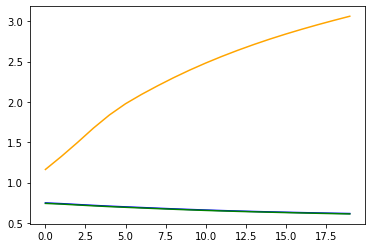

In [37]:
plt.plot([i for i in range(20)], std_x, color='blue')
plt.plot([i for i in range(20)], std_y, color='green')
plt.plot([i for i in range(20)], std_z, color='orange')
plt.show()

In [0]:
from mpl_toolkits.mplot3d import axes3d

def plot_frame(i,j):
  fig = plt.figure()
  #ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
  ax = fig.gca(projection='3d')
  ax.set_zlim3d(-8,2)
  ax.scatter(scene[i][j][' x '],scene[i][j][' y '],scene[i][j][' z '])

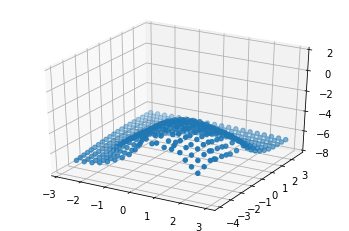

In [44]:
plot_frame(2,19)


# Data preperation

1.   We keep all the vertices for each frame in a single vector x(t) where t is the frame.
2.   We make a matrix X combining all the x(t) into a single matrix.



In [0]:
frame = scene
for i in range(5):
  for t in range(20):
    frame[i][t] = frame[i][t].drop('Vertex ',axis=1)
    frame[i][t] = frame[i][t].values.flatten()

In [47]:
frame[0][0].shape

(1200,)

In [0]:
allframes = []
for i in range(5):
  for t in range(20):
    allframes.append(frame[i][t])


In [49]:
len(allframes)

100

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
principalComponents = pca.fit_transform(allframes)

In [54]:
pca.components_.shape

(32, 1200)

In [71]:
principalComponents[99]

array([-8.35014346e+01, -5.16801143e+01,  1.27186552e+01, -4.99433997e+00,
       -3.06912409e+00, -7.25054797e+00,  5.00318138e-01, -4.79815858e+00,
        8.96694379e-01,  3.93586476e-01, -1.38651135e-01, -8.10052417e-02,
        7.81852954e-01,  1.12702627e+00, -5.00245598e-01, -7.69494957e-02,
       -6.03916389e-02, -2.21494313e-02,  1.03902873e-01, -9.83489025e-02,
       -1.10193043e-01, -2.87472008e-01, -1.76606867e-01, -5.37781159e-02,
        1.42331135e-02, -5.43664871e-03,  7.95627392e-02,  9.80108106e-02,
        1.71611124e-01, -2.25959670e-02,  1.28484322e-02,  6.73819040e-03])

In [56]:
pca.inverse_transform(principalComponents[0])

array([ -1.3009953 ,  -1.29157864, -18.29339145, ...,   1.08654235,
         1.08127444, -17.15831471])

In [58]:
allframes[0]

array([ -1.30210994,  -1.29261665, -18.29202846, ...,   1.08645316,
         1.08047149, -17.15841394])

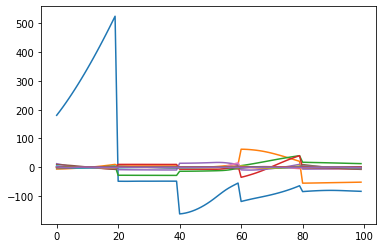

In [74]:
for j in range(15):
  plt.plot([i for i in range(100)], [principalComponents[i][j] for i in range(100)])

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
zt = principalComponents

In [0]:
x1 = []
for j in range(5):
  for i in range(18):
    x1.append([principalComponents[j*20 + i+1][0],principalComponents[j*20 + i+1][0]-principalComponents[j*20+i][0]])

In [0]:
y1 = []
for j in range(5):
  for i in range(2,20):
    y1.append(principalComponents[j*20+i][0])

In [0]:
x1 = np.array(x1)
y1 = np.array(y1)

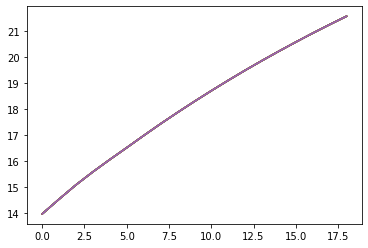

In [92]:
for j in range(15):
  plt.plot([i for i in range(19)], [principalComponents[i+1][0] - principalComponents[i][0] for i in range(19)])

In [0]:
regressor = LinearRegression().fit(x1,y1)

In [102]:
regressor.coef_

array([0.99937335, 1.03513452])

In [123]:
x1[0]

array([194.40196387,  13.95713274])

In [0]:
z_pred = [x1[0][0]]
z = regressor.predict([x1[0]])
z_pred.append(z[0])

for i in range(1,18):
  z_pred.append(regressor.predict([[z_pred[i],z_pred[i]-z_pred[i-1]]])[0])

In [180]:
z_pred

[194.4019638653541,
 208.6791888909153,
 223.27880567724523,
 238.2029924681406,
 253.45380064746226,
 269.03314899647455,
 284.94281783251415,
 301.1844430284923,
 317.75950991279086,
 334.669347049173,
 351.9151198963902,
 369.4978243472324,
 387.4182801468338,
 405.67712419011724,
 424.27480369832983,
 443.21156927469883,
 462.4874678393114,
 482.10233544340286,
 502.05578996331894]

In [176]:
x

[223.27880567724523, 14.599616786329932]

In [0]:
z_new = []
for i in range(18):
  z_new.append([z_pred[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [182]:
z_new[1]

[208.6791888909153,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [0]:
z_new = pca.inverse_transform(z_new)

In [184]:
z_new[2][3]

1.2152047809783026

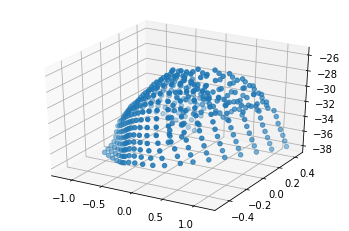

In [193]:
i=17
z_x = [z_new[i][j] for j in range(0,1200,3)]
z_y = [z_new[i][j] for j in range(1,1200,3)]
z_z =  [z_new[i][j] for j in range(2,1200,3)]
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')
ax.scatter(z_x,z_y,z_z)